# DBSCAN Clustering

## Importing the libraries

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [26]:
dataset = pd.read_csv('Mall_Customers.csv')
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [27]:
X = dataset.iloc[:, [3, 4]].values
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

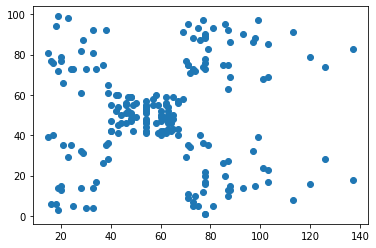

In [28]:
plt.scatter(X[:,0], X[:,1])

## Using the epsilon and min samples to find the optimal number of clusters

In [29]:
from sklearn.cluster import DBSCAN
# Compute DBSCAN
epsilon = 14
min_samples = 1
db = DBSCAN(eps=epsilon, min_samples=min_samples).fit(X)
labels = db.labels_
db

DBSCAN(eps=14, min_samples=1)

In [30]:
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 2])

In [31]:
no_clusters = len(np.unique(labels) )
no_noise = np.sum(np.array(labels) == -1, axis=0)

print('Estimated no. of clusters: %d' % no_clusters)
print('Estimated no. of noise points: %d' % no_noise)

Estimated no. of clusters: 3
Estimated no. of noise points: 0


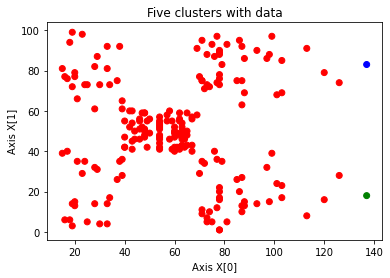

In [32]:
# Generate scatter plot for the clustered data

colors = list(map(lambda x: 'r' if x == 0 
                  else ('g' if x == 1 
                        else ( 'b' if x==2 
                              else ('c' if x==3 
                                    else ('k' if x==4 
                                          else 'm' ))))
                  , labels))

plt.scatter(X[:,0], X[:,1], c=colors, marker="o", picker=True)
plt.title('Five clusters with data')
plt.xlabel('Axis X[0]')
plt.ylabel('Axis X[1]')
plt.show()

## Getting optimal Epsilon and min distance using nearest neighbour

In [33]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(X)
distances, indices = nbrs.kneighbors(X)

## Visualising NN Values

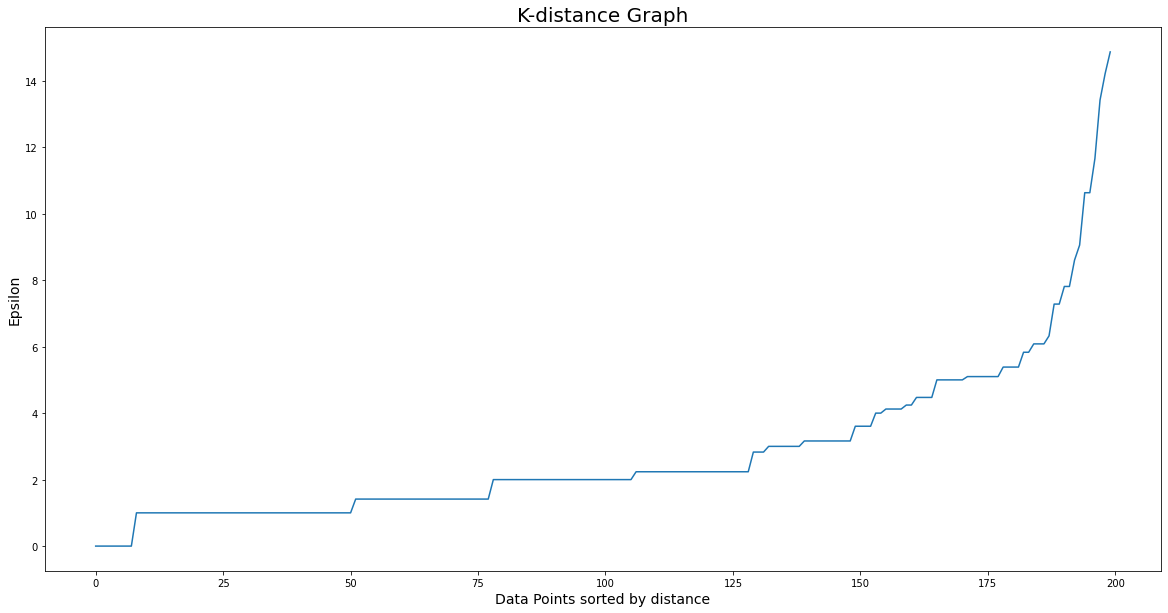

In [34]:
# Plotting K-distance Graph
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(20,10))
plt.plot(distances)
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show()

In [35]:
from sklearn.cluster import DBSCAN
# Compute DBSCAN
epsilon = 10
min_samples = 5
db = DBSCAN(eps=epsilon, min_samples=min_samples).fit(X)
labels = db.labels_

In [36]:
no_clusters = len(np.unique(labels) )
no_noise = np.sum(np.array(labels) == -1, axis=0)

print('Estimated no. of clusters: %d' % no_clusters)
print('Estimated no. of noise points: %d' % no_noise)

Estimated no. of clusters: 5
Estimated no. of noise points: 17


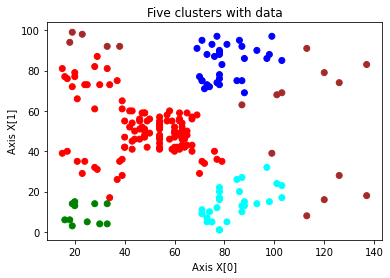

In [37]:
# Generate scatter plot for clustered data

colors = list(map(lambda x: 'red' if x == 0 
                  else ('green' if x == 1 
                        else ( 'blue' if x==2 
                              else ('cyan' if x==3 
                                    else ('black' if x==4 
                                          else( 'coral' if x==5 
                                              else ( 'yellow' if x==6 
                                                   else 'brown')) ))))
                  , labels))

plt.scatter(X[:,0], X[:,1], c=colors, marker="o", picker=True)
plt.title('Five clusters with data')
plt.xlabel('Axis X[0]')
plt.ylabel('Axis X[1]')
plt.show()

In [38]:
## Anomaly Detection Example with DBSCAN in Python

In [39]:
# We'll start by loading the required libraries for this tutorial.

from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs
from numpy import random, where
import matplotlib.pyplot as plt

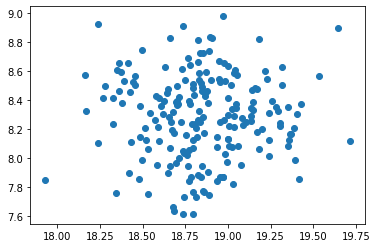

In [40]:
## Preparing the dataset
#We'll create a random sample dataset for this tutorial by using the make_blob() function.

random.seed(7)
x, _ = make_blobs(n_samples=200, centers=1, cluster_std=0.3, center_box=(20, 5))

#We'll check the dataset by visualizing it in a plot.

plt.scatter(x[:,0], x[:,1])
plt.show()


In [41]:
## Defining the model and anomaly detection
dbscan = DBSCAN(eps = 0.28, min_samples = 20)
print(dbscan) 

DBSCAN(eps=0.28, min_samples=20)


In [42]:
#We'll fit the model with x dataset and get the prediction data with the fit_predict() method.

pred = dbscan.fit_predict(x)
print(pred)

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0
 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0]


In [43]:
#Next, we'll extract the negative outputs as the outliers.

anom_index = where(pred == -1)
values = x[anom_index]

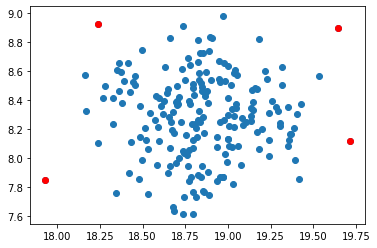

In [44]:
#Finally, we'll visualize the results in a plot by highlighting the anomalies with a color.

plt.scatter(x[:,0], x[:,1])
plt.scatter(values[:,0], values[:,1], color='r')
plt.show()